# Internship Project : YouTube Adview Prediction


## 1. Import the datasets and libraries, check shape and datatype.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data_train = pd.read_csv(path + "train.csv")

In [26]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [27]:
data_train.shape

(14999, 9)

## 2. Visualise the dataset using plotting using heatmaps and plots. 


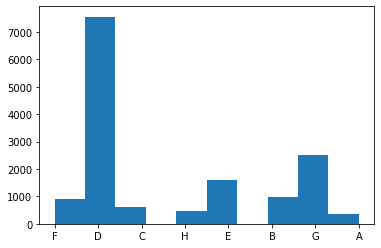

In [28]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()

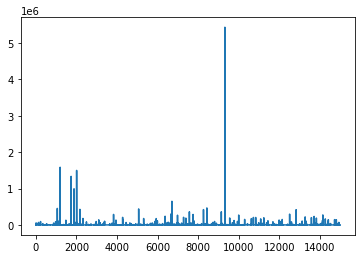

In [29]:
plt.plot(data_train["adview"])
plt.show()

## 3.Clean the dataset by removing missing values and other things.



In [30]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [31]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


## 4. Transform attributes into numerical values and other necessary transformations


In [32]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [33]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
data_train.head(5)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


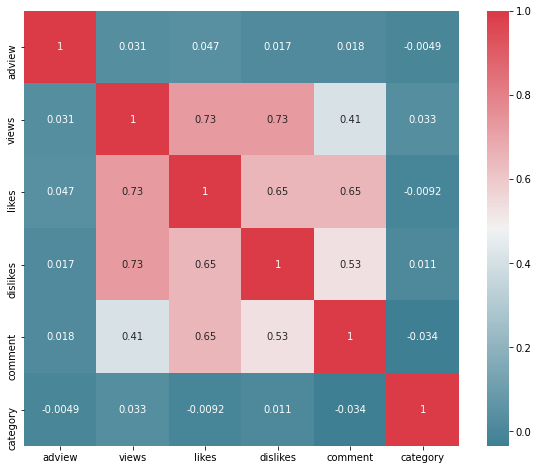

In [34]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [35]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [36]:
import datetime
import time

In [37]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [38]:
train=pd.read_csv(path + "train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

In [39]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


## 5. Normalise your data and split the data into training, validation and test set in the appropriate ratio.



In [40]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [42]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

## 6. Use linear regression, support vector regressor for training and get errors.


In [44]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [45]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [46]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


## 7. Use Decision Tree Regressor and Random Forest Regressors.



In [54]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2647.4955601092897
Mean Squared Error: 885861131.6875
Root Mean Squared Error: 29763.419354763322


In [51]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3403.8958845496504
Mean Squared Error: 626661416.4797316
Root Mean Squared Error: 25033.206276458706


## 8. Build an artificial neural network and train it with different layers and hyperparameters. 

In [49]:
# Artificial Neural Network
import keras
from keras.layers import Dense
import tensorflow

ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 902us/step - loss: 767404416.0000 - mean_squared_error: 767404416.0000
Epoch 2/100
366/366 [==============================] - 0s 895us/step - loss: 767394816.0000 - mean_squared_error: 767394816.0000
Epoch 3/100
366/366 [==============================] - 0s 921us/step - loss: 767379776.0000 - mean_squared_error: 767379776.0000
Epoch 4/100
366/366 [==============================] - 0s 911us/step - loss: 767355648.0000 - mean_squared_error: 767355648.0000
Epoch 5/100
366/366 [==============================] - 0s 858us/step - loss: 767320832.0000 - mean_squared_error: 767320832.0000
Epoch 6/100
366/366 [==============================] - 0s 847us/step - loss: 767272576.0000 - mean_squared_error: 767272576.0000
Epoch 7/100
366/366 [==============================] - 0s 892us/step - loss: 767212672.0000 - mean_squared_error: 767212672.0000
Epoch 8/100
366/366 [==============================] - 0s 858us/step - loss: 767138752.0000 - mea

In [55]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
#ann.save("ann_youtubeadview.h5")

['decisiontree_youtubeadview.pkl']

# Test Data



In [80]:
data_test = pd.read_csv("test.csv")

In [81]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [82]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [83]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

In [84]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [85]:
test=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

In [86]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [87]:
data_test=data_test.drop(["vidid"],axis=1)


In [88]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pred=scaler.fit_transform(data_test)
pred.mean()

0.16965883079102045

In [89]:
import joblib
model = joblib.load("decisiontree_youtubeadview.pkl")
prediction = model.predict(data_test)

In [92]:
print(prediction)

[58. 58. 58. ... 58. 58. 58.]


In [90]:
#saving prediction as csv file
np.savetxt('Predictions.csv',prediction,delimiter=',')